# Lopez-Vaamonde's fig-wasp interaction

This notebook recapitulates Liam Revell's [extraction](http://blog.phytools.org/2016/08/empirical-co-phylogenetic-cophylo.html) of [Lopez-Vaamonde *et al.*](http://dx.doi.org/10.1006/mpev.2001.0993) on the `phytools` [blog](http://blog.phytools.org). The citation for the original data is as follows :

> Lopez-Vaamonde, C., J. Y. Rasplus, G. D. Weiblen, & J. M. Cook. 2001. *Molecular phylogenies of fig wasps: Partial cocladogenesis of pollinators and parasites.* Molecular Phylogenetics and Evolution 21: 55-71.

I've modified Liam's code to remove the squiggle braces from the names, as this makes for invalid NEWICK files.

In [1]:
%load_ext rpy2.ipython
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%R -w 800 -h 480 -u px

# First, Liam's code from the blog post...

library(phytools)
Pleistodontes<-read.tree(text="(((1,(2,3)100)50,(((((((4,(5,(6,7)100)69)100,(8,(9,10))81)61,11),(12,13)100),(14,15)100),(16,17)96),18)),19);")
Pleistodontes$tip.label<-c("P._froggatti",
    "P._blandus",
    "P._near_blandus",
    "P._proximus",
    "P._athysanus",
    "P._cuneatus",
    "P._astrabocheilus",
    "P._macrocainus",
    "P._rigisamos",
    "P._imperialis",
    "P._nigriventris",
    "P._xanthocephalus",
    "P._greenwoodi",
    "P._rieki",
    "P._plebejus",
    "P._schizodontes",
    "P._nitens",
    "P._spec._nov._1",
    "P._regalis")
## rotate all nodes to match orientation in article
Pleistodontes<-rotateNodes(Pleistodontes,"all")
Sycoscapter<-read.tree(text="(1,((((2,3)100,((4,5),(6,7)78)100),((8,9)50,10)99),(((11,12),13)91,(14,15)77)));")
Sycoscapter$tip.label<-c("S._australis_macrophylla",
    "S._3_playpoda",
    "S._5_cerasicarpa",
    "S._6_lilliputiana",
    "S._7_subpuberula",
    "S._1_brachypoda",
    "S._15_rubiginosa",
    "S._9_triradiata",
    "S._10_crassipes",
    "S._8_pleurocarpa",
    "S._11_glandifera",
    "S._12_xylosycia",
    "S._14_hesperidiiformis",
    "S._2_aff._obliqua",
    "S._4_obliqua")
Sycoscapter<-rotateNodes(Sycoscapter,"all")
assoc<-cbind(
    Pleistodontes$tip.label[c(7,8,5,6,18,1,3,4,10,15,13,16,12,14,19)],
    Sycoscapter$tip.label)
assoc

      [,1]                [,2]                      
 [1,] "P._greenwoodi"     "S._4_obliqua"            
 [2,] "P._xanthocephalus" "S._2_aff._obliqua"       
 [3,] "P._plebejus"       "S._14_hesperidiiformis"  
 [4,] "P._rieki"          "S._12_xylosycia"         
 [5,] "P._blandus"        "S._11_glandifera"        
 [6,] "P._regalis"        "S._8_pleurocarpa"        
 [7,] "P._nitens"         "S._10_crassipes"         
 [8,] "P._schizodontes"   "S._9_triradiata"         
 [9,] "P._imperialis"     "S._15_rubiginosa"        
[10,] "P._athysanus"      "S._1_brachypoda"         
[11,] "P._astrabocheilus" "S._7_subpuberula"        
[12,] "P._proximus"       "S._6_lilliputiana"       
[13,] "P._macrocainus"    "S._5_cerasicarpa"        
[14,] "P._cuneatus"       "S._3_playpoda"           
[15,] "P._froggatti"      "S._australis_macrophylla"


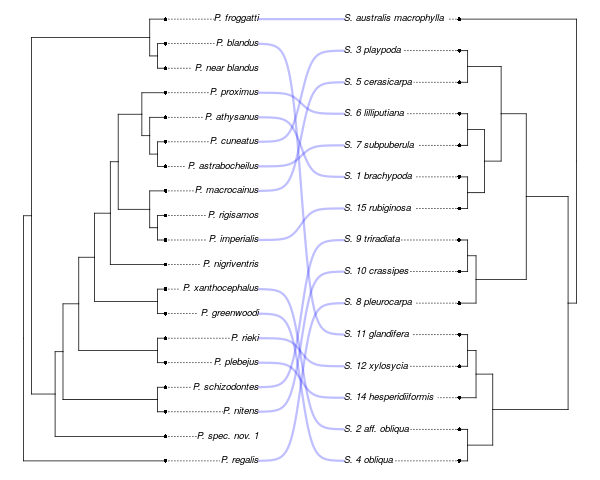

In [4]:
%%R -w 600 -h 480 -u px

obj<-cophylo(Pleistodontes,Sycoscapter,assoc=assoc,
    rotate=FALSE)
obj
plot(obj,link.type="curved",link.lwd=3,link.lty="solid",
    link.col=make.transparent("blue",0.25),fsize=0.8)

Looks good. Now, let's write this out to disk and get the heck out of R...

In [5]:
%%R

write.tree( Pleistodontes, file='host.tree' )
write.tree( Sycoscapter,  file='guest.tree' )
write.csv( assoc, file='assoc.csv' )

Now, let's make a proper link matrix.

In [6]:
import pandas

l = pandas.read_csv( 'assoc.csv', index_col=0 )
l

,V1,V2
1,P._greenwoodi,S._4_obliqua
2,P._xanthocephalus,S._2_aff._obliqua
3,P._plebejus,S._14_hesperidiiformis
4,P._rieki,S._12_xylosycia
5,P._blandus,S._11_glandifera
6,P._regalis,S._8_pleurocarpa
7,P._nitens,S._10_crassipes
8,P._schizodontes,S._9_triradiata
9,P._imperialis,S._15_rubiginosa
10,P._athysanus,S._1_brachypoda


Are there any duplicated names?

In [7]:
len(set(l['V1'])) == len(l['V1']), len(set(l['V2'])) == len(l['V2'])

(True, True)

Nope! That makes things easy.

In [8]:
import numpy

l_matrix = numpy.zeros( ( l.shape[0], l.shape[0] ), dtype=int )

for n,(a,b) in l.iterrows() :
    i,j = list(l['V1']).index(a), list(l['V2']).index(b)
    #print n,a,b,i,j 
    l_matrix[i,j] = 1

l_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Well, that was a lot of fuss to go through to verify that the data
is already all neat and orderly. Let's get this written out as a proper data table.

In [9]:
links = pandas.DataFrame( l_matrix, index=list(l['V1']), 
                                    columns=list(l['V2']) )
links.to_csv('lopez-fig-wasp_links.csv')
links

,S._4_obliqua,S._2_aff._obliqua,S._14_hesperidiiformis,S._12_xylosycia,S._11_glandifera,S._8_pleurocarpa,S._10_crassipes,S._9_triradiata,S._15_rubiginosa,S._1_brachypoda,S._7_subpuberula,S._6_lilliputiana,S._5_cerasicarpa,S._3_playpoda,S._australis_macrophylla
P._greenwoodi,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P._xanthocephalus,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
P._plebejus,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
P._rieki,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
P._blandus,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
P._regalis,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
P._nitens,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
P._schizodontes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
P._imperialis,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P._athysanus,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Nice. Now, let's make sure we can load this dataset correctly with SuchTree

In [10]:
from SuchTree import SuchTree, SuchLinkedTrees
import pandas

T1 = SuchTree('host.tree')
T2 = SuchTree('guest.tree')
links = pandas.read_csv('lopez-fig-wasp_links.csv', index_col=0)

Nifty. That works. The last problem is that there are some leafs that don't have any links.
This will mess up the spectral analysis, so we're going to need to prune those.

In [11]:
set( T1.leafs.keys() ) - set( links.index )

{'P._near_blandus', 'P._nigriventris', 'P._rigisamos', 'P._spec._nov._1'}

In [12]:
set( T2.leafs.keys() ) - set( links.columns )

set()

In [13]:
from dendropy import Tree

t = Tree.get( file=open('host.tree'), schema='newick', preserve_underscores=True )

print 'number of taxa in original tree :', len( [ node.taxon.label for node in t.leaf_nodes() ] )

t.prune_taxa_with_labels( set( T1.leafs.keys() ) - set( links.index ) )

print 'number of taxa after pruning :',  len( [ node.taxon.label for node in t.leaf_nodes() ] )

t.write_to_path( 'host.tree', schema='newick' )

number of taxa in original tree : 19
number of taxa after pruning : 15


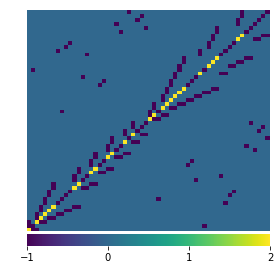

In [16]:
figure(figsize=(4,4))

T1 = SuchTree('host.tree')

SLT = SuchLinkedTrees( T1, T2, links )
lp = SLT.laplacian()

pcolor( lp, cmap='viridis', vmin=-1, vmax=2 )
xlim( (0,lp.shape[0]) )
ylim( (0,lp.shape[1]) )
#xticks([])
#yticks([])
axis('off')
cb = colorbar( ticks=[-1,0,1,2], orientation='horizontal', drawedges=False, pad=0.01 )
cb.outline.set_linewidth(0)

tight_layout()

In [26]:
T2.adjacency()

{'adjacency_matrix': array([[  0.00000000e+00,   2.22044605e-16,   2.22044605e-16,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00],
        [  2.22044605e-16,   0.00000000e+00,   0.00000000e+00,
           2.22044605e-16,   2.22044605e-16,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.000